# 1. Data

**[컬럼 세부]**

  * **Survival** - 생존 여부. 0이면 사망, 1이면 생존한 것으로 간주합니다.
  * **Pclass** - 티켓 등급. 1등석(1), 2등석(2), 3등석(3)이 있으며, 1등석일수록 좋고 3등석일수록 좋지 않습니다.
  * **Sex** - 성별. 남자(male)와 여자(female)이 있습니다.
  * **Age** - 나이입니다. 틈틈히 빈 값이 존재하며, 소수점 값도 존재합니다.
  * **SibSp** - 해당 승객과 같이 탑승한 형재/자매(siblings)와 배우자(spouses)의 총 인원 수입니다.
  * **Parch** - 해당 승객과 같이 탑승한 부모(parents)와 자식(children)의 총 인원 수입니다.
  * **Ticket** - 티켓 번호입니다. 다양한 텍스트(문자열)로 구성되어 있습니다.
  * **Fare** - 운임 요금입니다. 소수점으로 구성되어 있습니다.
  * **Cabin** - 객실 번호입니다. 많은 빈 값이 존재하며, 다양한 텍스트(문자열)로 구성되어 있습니다.
  * **Embarked** - 선착장입니다. C는 셰르부르(Cherbourg)라는 프랑스 지역, Q는 퀸스타운(Queenstown)이라는 영국 지역, S는 사우스햄튼(Southampton)이라는 영국 지역입니다.


In [1]:
train = pd.read_csv("/Users/kimjeongseob/Desktop/Study/0.Project/3. Machine Learning Practice/dataset/titanic/train.csv",index_col="PassengerId")
test = pd.read_csv("/Users/kimjeongseob/Desktop/Study/0.Project/3. Machine Learning Practice/dataset/titanic/test.csv",index_col="PassengerId")

In [2]:
train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
train.shape

(891, 11)

In [4]:
test.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [5]:
test.shape

(418, 10)

# 2. Preprocessing

    [sckikit-learn 알고리즘에 사용 가능한 데이터 자료형]
    
    1. 모든 데이터는 숫자(정수형, 소수점 등)로 구성되어야 함
    2. 데이터에 빈 값이 없어야 함
   

### 2-0. missing value

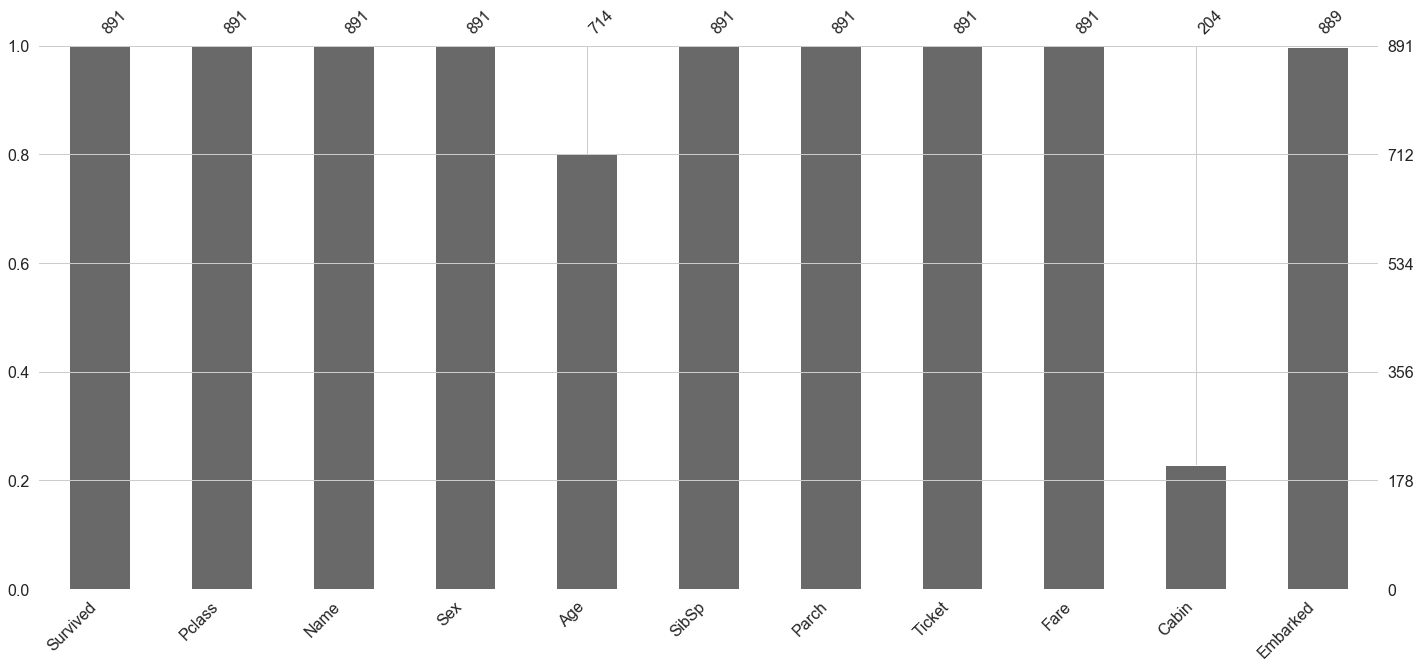

In [6]:
%matplotlib inline
import missingno as msno

msno.bar(train)

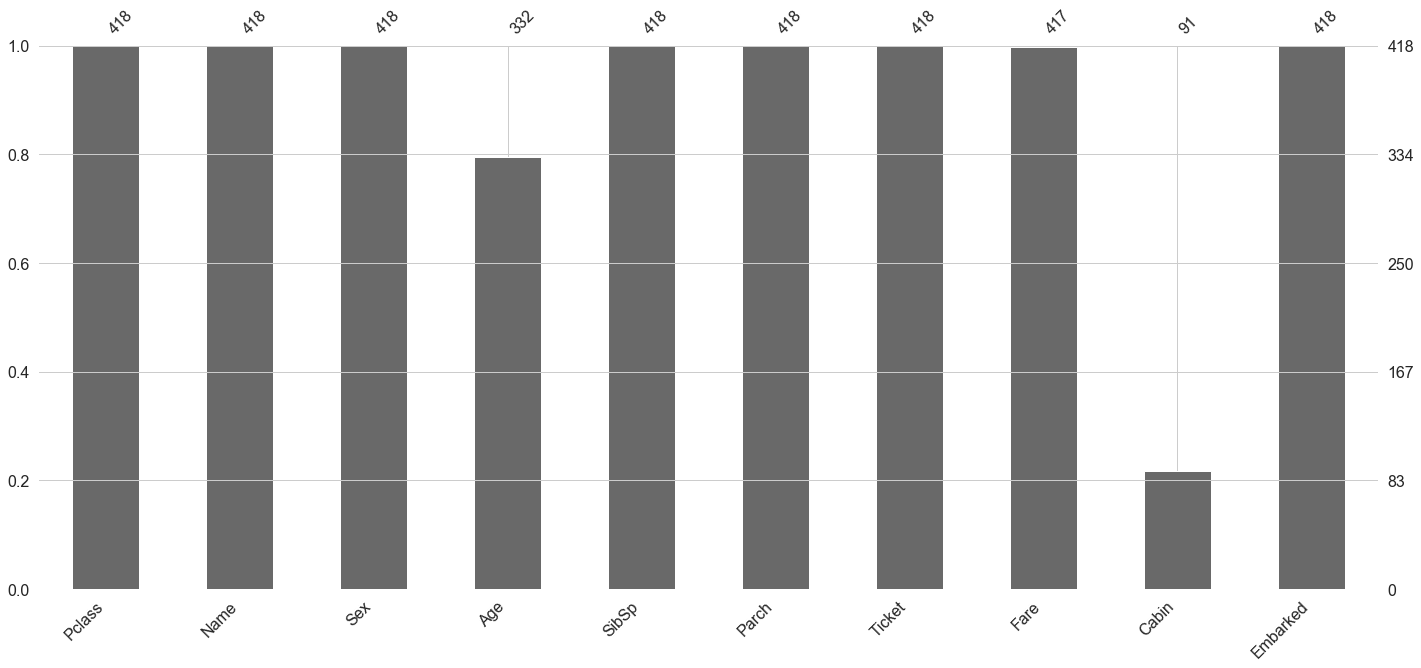

In [7]:
# 'Fare'에 missing value 확인
msno.bar(test)

### 2-1. Encode 'Sex' column

    1. male : 0
    2. female : 1

In [9]:
train.loc[train.Sex == 'male','Sex_encoded'] = 0
train.loc[train.Sex == 'female','Sex_encoded'] = 1
test.loc[test.Sex == 'male','Sex_encoded'] = 0
test.loc[test.Sex == 'female','Sex_encoded'] = 1

In [10]:
train.Sex_encoded.unique()

array([0., 1.])

In [11]:
train[['Sex','Sex_encoded']].head(5)

,Sex,Sex_encoded
PassengerId,,
1,male,0.0
2,female,1.0
3,female,1.0
4,female,1.0
5,male,0.0


### 2-2. Fill in missing fare (test data)

- mean 값으로 채우기

In [12]:
train[train.Fare.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded
PassengerId,,,,,,,,,,,,


In [13]:
test[test.Fare.isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded
PassengerId,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0.0


In [14]:
train['Fare_filled'] = train.Fare
test['Fare_filled'] = test.Fare

In [15]:
train[['Fare','Fare_filled']].head(3)

,Fare,Fare_filled
PassengerId,,
1,7.2500,7.2500
2,71.2833,71.2833
3,7.9250,7.9250


In [16]:
test[['Fare','Fare_filled']].head(3)

,Fare,Fare_filled
PassengerId,,
892,7.8292,7.8292
893,7.0000,7.0000
894,9.6875,9.6875


In [17]:
test.loc[test.Fare.isnull(),'Fare_filled'] = test.Fare.mean()

In [18]:
test[test.Fare.isnull()][['Fare','Fare_filled']]

,Fare,Fare_filled
PassengerId,,
1044,NaN,35.627188


In [19]:
train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded,Fare_filled
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,7.2500
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,71.2833
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,7.9250


In [20]:
test.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded,Fare_filled
PassengerId,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0,7.8292
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1.0,7.0000
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0,9.6875


### 2-3. Encode Embarked

column 'Embarked'
- C : 0
- S : 1
- Q : 2

column 'Embarked_C, Embarked_S, Embarked_Q'
- True / False

In [21]:
train['Embarked_encoded'] = train.Embarked
test['Embarked_encoded'] = test.Embarked

In [22]:
train.loc[train['Embarked'] == 'C','Embarked_encoded'] = 0
train.loc[train['Embarked'] == 'S','Embarked_encoded'] = 1
train.loc[train['Embarked'] == 'Q','Embarked_encoded'] = 2
test.loc[test['Embarked'] == 'Q','Embarked_encoded'] = 0
test.loc[test['Embarked'] == 'S','Embarked_encoded'] = 1
test.loc[test['Embarked'] == 'Q','Embarked_encoded'] = 2

In [23]:
train['Embarked_C'] = train.Embarked == 'C'
train['Embarked_S'] = train.Embarked == 'S'
train['Embarked_Q'] = train.Embarked == 'Q'

In [24]:
test['Embarked_C'] = test.Embarked == 'C'
test['Embarked_S'] = test.Embarked == 'S'
test['Embarked_Q'] = test.Embarked == 'Q'

In [25]:
train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded,Fare_filled,Embarked_encoded,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,7.2500,1,False,True,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,71.2833,0,True,False,False
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,7.9250,1,False,True,False


In [26]:
test.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded,Fare_filled,Embarked_encoded,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0,7.8292,2,False,False,True
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1.0,7.0000,1,False,True,False
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0,9.6875,2,False,False,True


In [27]:
train.shape

(891, 17)

In [28]:
test.shape

(418, 16)

# 3. Train

In [29]:
feature_names = ["Pclass", "Sex_encoded", "Fare_filled",
                 "Embarked_C", "Embarked_S", "Embarked_Q"]
feature_names

['Pclass',
 'Sex_encoded',
 'Fare_filled',
 'Embarked_C',
 'Embarked_S',
 'Embarked_Q']

In [30]:
label_name = "Survived"
label_name

'Survived'

In [34]:
X_train = train[feature_names]
X_train.head(3)

,Pclass,Sex_encoded,Fare_filled,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,
1,3,0.0,7.2500,False,True,False
2,1,1.0,71.2833,True,False,False
3,3,1.0,7.9250,False,True,False


In [33]:
X_test = test[feature_names]
X_test.head(3)

,Pclass,Sex_encoded,Fare_filled,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,
892,3,0.0,7.8292,False,False,True
893,3,1.0,7.0000,False,True,False
894,2,0.0,9.6875,False,False,True


In [35]:
y_train = train[label_name]
y_train.head(3)

PassengerId
1    0
2    1
3    1
Name: Survived, dtype: int64

### 3-1. QDA

In [36]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X_train, y_train)

In [38]:
from sklearn.metrics import confusion_matrix

y_pred = pd.DataFrame(qda.predict(X_train))

confusion_matrix(y_train, y_pred)

array([[549,   0],
       [337,   5]])

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       549
           1       1.00      0.01      0.03       342

    accuracy                           0.62       891
   macro avg       0.81      0.51      0.40       891
weighted avg       0.77      0.62      0.48       891



In [42]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, qda.predict_proba(X_train)[:, 1])

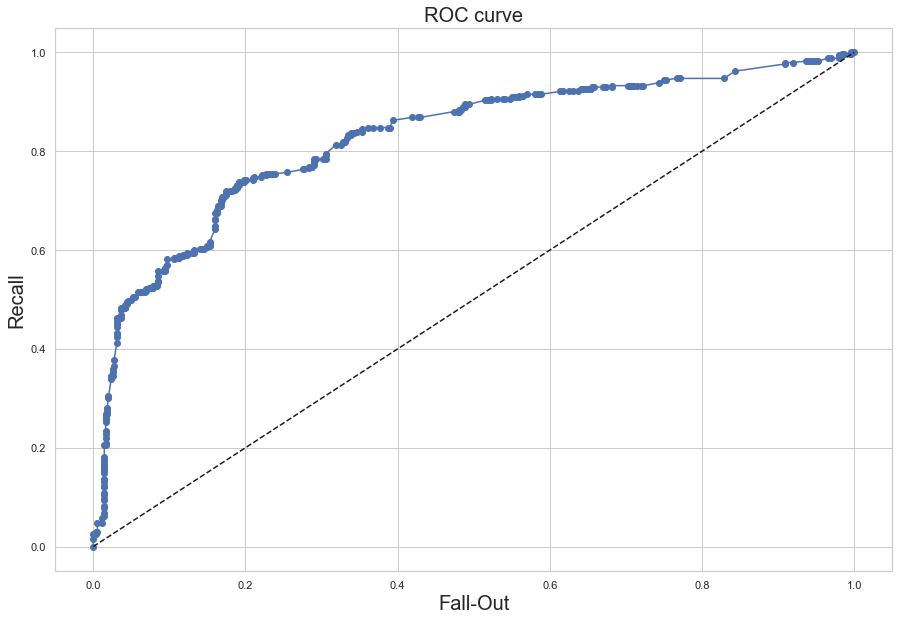

In [43]:
%matplotlib inline
plt.figure(figsize=(15,10))
plt.plot(fpr, tpr, 'o-', label="QDA")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('Fall-Out',fontsize=20)
plt.ylabel('Recall',fontsize=20)
plt.title('ROC curve',fontsize=20)
plt.show()

### 3-2. LDA

In [47]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=3, solver="svd", store_covariance=True).fit(X_train, y_train)

In [53]:
from sklearn.metrics import confusion_matrix

y_pred = pd.DataFrame(lda.predict(X_train))

confusion_matrix(y_train, y_pred)

array([[468,  81],
       [107, 235]])

In [54]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       549
           1       0.74      0.69      0.71       342

    accuracy                           0.79       891
   macro avg       0.78      0.77      0.77       891
weighted avg       0.79      0.79      0.79       891



In [56]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, lda.predict_proba(X_train)[:, 1])

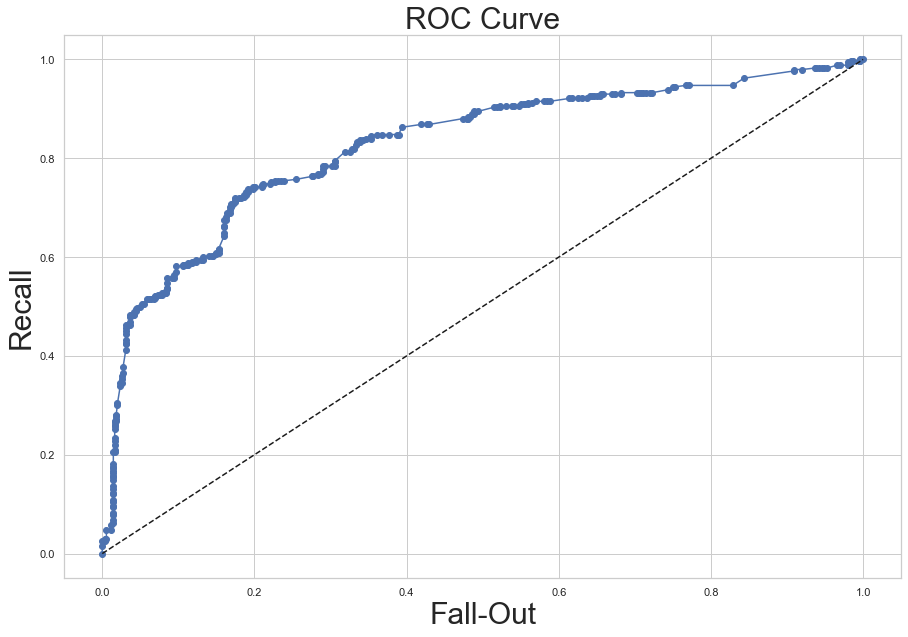

In [51]:
%matplotlib inline
plt.figure(figsize=(15,10))
plt.plot(fpr, tpr, 'o-', label="LDA")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('Fall-Out',fontsize=30)
plt.ylabel('Recall',fontsize=30)
plt.title('ROC Curve',fontsize=30)
plt.show()

### 3-3. NB

In [60]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB().fit(X_train, y_train)

In [61]:
from sklearn.metrics import confusion_matrix

y_pred = pd.DataFrame(NB.predict(X_train))

confusion_matrix(y_train, y_pred)

array([[485,  64],
       [119, 223]])

In [63]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       549
           1       0.78      0.65      0.71       342

    accuracy                           0.79       891
   macro avg       0.79      0.77      0.78       891
weighted avg       0.79      0.79      0.79       891



In [66]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, NB.predict_proba(X_train)[:, 1])

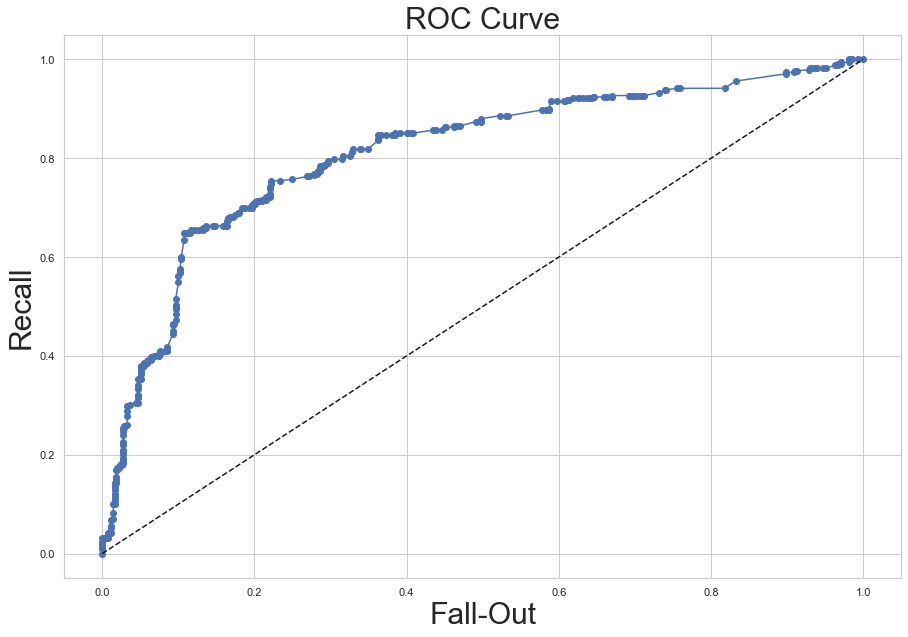

In [67]:
%matplotlib inline
plt.figure(figsize=(15,10))
plt.plot(fpr, tpr, 'o-', label="Naive-Bayes")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('Fall-Out',fontsize=30)
plt.ylabel('Recall',fontsize=30)
plt.title('ROC Curve',fontsize=30)
plt.show()

### 3-4. QDA, LDA, NB 비교

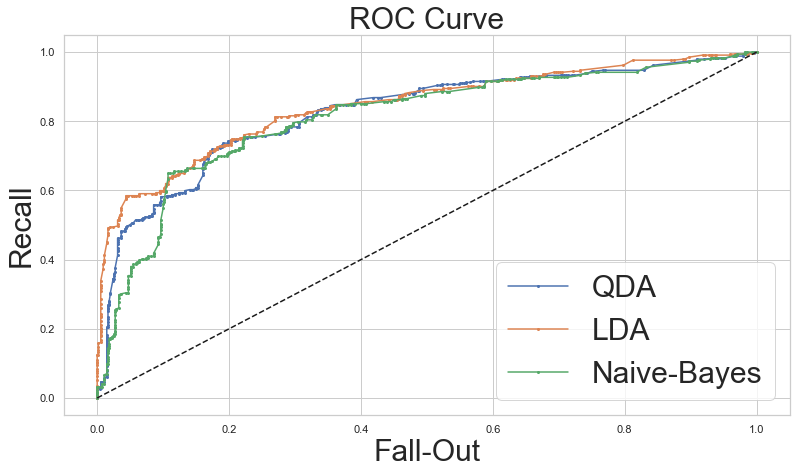

LDA의 AUC : 0.8438 / QDA의 AUC : 0.8251 / Naive-Bayes의 AUC : 0.8106


In [70]:
from sklearn.metrics import auc

fpr1, tpr1, thresholds1 = roc_curve(y_train, qda.decision_function(X_train))
fpr2, tpr2, thresholds1 = roc_curve(y_train, lda.decision_function(X_train))
fpr3, tpr3, thresholds3 = roc_curve(y_train, NB.predict_proba(X_train)[:, 1])

plt.figure(figsize=(13,7))
plt.plot(fpr1, tpr1, 'o-', ms=2, label="QDA")
plt.plot(fpr2, tpr2, 'o-', ms=2, label="LDA")
plt.plot(fpr3, tpr3, 'o-', ms=2, label="Naive-Bayes")
plt.legend(fontsize=30)
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('Fall-Out',fontsize=30)
plt.ylabel('Recall',fontsize=30)
plt.title('ROC Curve',fontsize=30)
plt.show()

auc_qda = auc(fpr1,tpr1)
auc_lda = auc(fpr2,tpr2)
auc_NB = auc(fpr3,tpr3)
print("LDA의 AUC : {} / QDA의 AUC : {} / Naive-Bayes의 AUC : {}".
      format(round(auc_lda,4),round(auc_qda,4),round(auc_NB,4)))

### 3-5. K-fold Cross validation test

#### 1) QDA

In [82]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

qda_CV = cross_val_score(qda, X_train, y_train, scoring=None, cv=5)
lda_CV = cross_val_score(lda, X_train, y_train, scoring=None, cv=5)
NB_CV = cross_val_score(NB, X_train, y_train, scoring=None, cv=5)

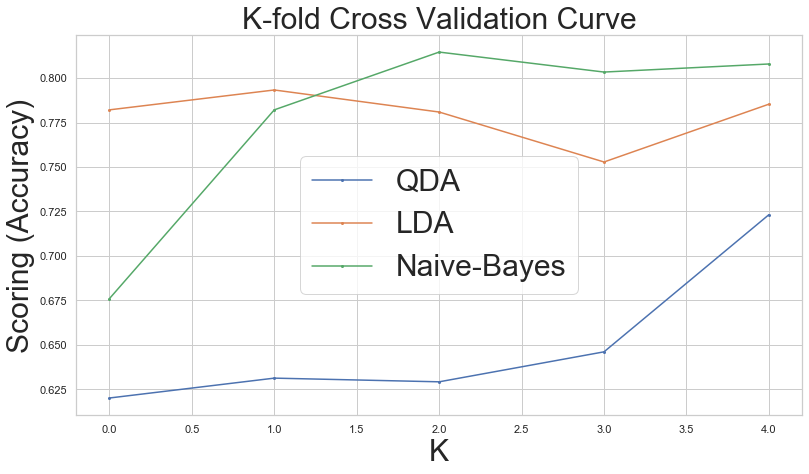

In [83]:
plt.figure(figsize=(13,7))
plt.plot(qda_CV, 'o-', ms=2, label="QDA")
plt.plot(lda_CV, 'o-', ms=2, label="LDA")
plt.plot(NB_CV, 'o-', ms=2, label="Naive-Bayes")
plt.legend(fontsize=30)
plt.xlabel('K',fontsize=30)
plt.ylabel('Scoring (Accuracy)',fontsize=30)
plt.title('K-fold Cross Validation Curve',fontsize=30)
plt.show()